In [1]:
# Data Handling and Analysis
import pandas as pd
import pandas_datareader as pdr
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# API for Financial Data
import yfinance as yf

# Miscellaneous
import datetime

# Get list of S&P 500 companies

In [2]:
table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
sp500 = table[0]
sp500_tickers = sp500['Symbol'].tolist()

# Download data for all S&P500 tickers

In [3]:
def download_data_for_all(tickers):
    all_data = {}
    for ticker in tickers:
        try:
            stock = yf.Ticker(ticker)
            # Fetch historical data and general info
            hist = stock.history(period="5y")  # Historical data
            info = stock.info  # General info

            # Store in dictionary
            all_data[ticker] = {'history': hist, 'info': info}

            # Print a message to track progress
            print(f"Data downloaded for {ticker}")
        except Exception as e:
            print(f"Error downloading data for {ticker}: {e}")
    return all_data

all_sp500_data = download_data_for_all(sp500_tickers)

Data downloaded for MMM
Data downloaded for AOS
Data downloaded for ABT
Data downloaded for ABBV
Data downloaded for ACN
Data downloaded for ADM
Data downloaded for ADBE
Data downloaded for ADP
Data downloaded for AES
Data downloaded for AFL
Data downloaded for A
Data downloaded for ABNB
Data downloaded for APD
Data downloaded for AKAM
Data downloaded for ALK
Data downloaded for ALB
Data downloaded for ARE
Data downloaded for ALGN
Data downloaded for ALLE
Data downloaded for LNT
Data downloaded for ALL
Data downloaded for GOOGL
Data downloaded for GOOG
Data downloaded for MO
Data downloaded for AMZN
Data downloaded for AMCR
Data downloaded for AMD
Data downloaded for AEE
Data downloaded for AAL
Data downloaded for AEP
Data downloaded for AXP
Data downloaded for AIG
Data downloaded for AMT
Data downloaded for AWK
Data downloaded for AMP
Data downloaded for AME
Data downloaded for AMGN
Data downloaded for APH
Data downloaded for ADI
Data downloaded for ANSS
Data downloaded for AON
Data d

BRK.B: No data found, symbol may be delisted


Data downloaded for BRK.B
Data downloaded for BBY
Data downloaded for BIO
Data downloaded for TECH
Data downloaded for BIIB
Data downloaded for BLK
Data downloaded for BX
Data downloaded for BK
Data downloaded for BA
Data downloaded for BKNG
Data downloaded for BWA
Data downloaded for BXP
Data downloaded for BSX
Data downloaded for BMY
Data downloaded for AVGO
Data downloaded for BR


BF.B: No price data found, symbol may be delisted (period=5y)


Data downloaded for BRO
Data downloaded for BF.B
Data downloaded for BG
Data downloaded for CHRW
Data downloaded for CDNS
Data downloaded for CZR
Data downloaded for CPT
Data downloaded for CPB
Data downloaded for COF
Data downloaded for CAH
Data downloaded for KMX
Data downloaded for CCL
Data downloaded for CARR
Data downloaded for CTLT
Data downloaded for CAT
Data downloaded for CBOE
Data downloaded for CBRE
Data downloaded for CDW
Data downloaded for CE
Data downloaded for COR
Data downloaded for CNC
Data downloaded for CNP
Data downloaded for CDAY
Data downloaded for CF
Data downloaded for CRL
Data downloaded for SCHW
Data downloaded for CHTR
Data downloaded for CVX
Data downloaded for CMG
Data downloaded for CB
Data downloaded for CHD
Data downloaded for CI
Data downloaded for CINF
Data downloaded for CTAS
Data downloaded for CSCO
Data downloaded for C
Data downloaded for CFG
Data downloaded for CLX
Data downloaded for CME
Data downloaded for CMS
Data downloaded for KO
Data downlo

In [9]:
# Initialize the dictionary to store metrics data
metrics_data = {}

for ticker, data in all_sp500_data.items():
    try:
        info = data['info']  # This variable holds the company information

        # Calculating relevant metrics
        pe_ratio = info.get('trailingPE', None)  # Price-to-Earnings Ratio
        pb_ratio = info.get('priceToBook', None)  # Price-to-Book Ratio
        dividend_yield = info.get('dividendYield', None)  # Dividend Yield
        debt_to_equity = info.get('debtToEquity', None)  # Debt-to-Equity Ratio
        current_ratio = info.get('currentRatio', None)
        earnings_yield = 1 / info.get('trailingPE', None) if info.get('trailingPE', None) else None

        # Store the calculated metrics in the metrics_data dictionary
        metrics_data[ticker] = {
            'PE Ratio': pe_ratio,
            'PB Ratio': pb_ratio,
            'Dividend Yield': dividend_yield,
            'Debt-to-Equity Ratio': debt_to_equity,
            'Current Ratio': current_ratio,
            'Earnings Yield': earnings_yield,
        }
    except Exception as e:
        print(f"Error processing data for {ticker}: {e}")

# Data cleaning

In [10]:
# Convert the metrics_data dictionary to a DataFrame
df = pd.DataFrame.from_dict(metrics_data, orient='index')

# Initial Overview
print("Initial Data Overview:")
print(df.head())
print(df.info())
print(df.describe())

# A. Inspect the Data
# 1. Identify Missing Values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# 2. Check for Anomalies/Outliers
print("\nSample Outliers Check:")
print(df[df['PE Ratio'] > 100])  # Example threshold, adjust as needed

# B. Clean the Data
# 1. Handling Missing Values
# Impute missing values with median (as an example)
df.fillna(0, inplace=True)

# 2. Correcting Data Errors
# Example: Correct negative values in a column that should only be positive
df['Debt-to-Equity Ratio'] = df['Debt-to-Equity Ratio'].apply(lambda x: abs(x))

# 3. Outlier Treatment
# Cap the PE Ratio at a certain percentile
cap_threshold = df['PE Ratio'].quantile(0.95)  # 95th percentile
df['PE Ratio'] = df['PE Ratio'].apply(lambda x: min(x, cap_threshold))

# C. Data Transformation
# Example: Normalizing the PE Ratio (Min-Max Scaling)
df['Normalized PE Ratio'] = (df['PE Ratio'] - df['PE Ratio'].min()) / (df['PE Ratio'].max() - df['PE Ratio'].min())

# D. Data Verification
# Post-cleaning summary
print("\nPost-cleaning Data Overview:")
print(df.describe())

print("Data cleaning and preparation complete.")

Initial Data Overview:
       PE Ratio   PB Ratio  Dividend Yield  Debt-to-Equity Ratio  \
MMM         NaN  11.711786          0.0606               357.578   
AOS   37.492540   5.954018          0.0170                 8.765   
ABT   35.472790   4.830477          0.0196                41.649   
ABBV  39.010956  20.786861          0.0435               504.427   
ACN   30.960968   8.146229          0.0155                11.902   

      Current Ratio  Earnings Yield  
MMM           1.047             NaN  
AOS           1.680        0.026672  
ABT           1.738        0.028191  
ABBV          0.955        0.025634  
ACN           1.298        0.032299  
<class 'pandas.core.frame.DataFrame'>
Index: 503 entries, MMM to ZTS
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PE Ratio              468 non-null    float64
 1   PB Ratio              466 non-null    float64
 2   Dividend Yield        401 non-

In [11]:
#Statistical Summary
print(df)

       PE Ratio   PB Ratio  Dividend Yield  Debt-to-Equity Ratio  \
MMM    0.000000  11.711786          0.0606               357.578   
AOS   37.492540   5.954018          0.0170                 8.765   
ABT   35.472790   4.830477          0.0196                41.649   
ABBV  39.010956  20.786861          0.0435               504.427   
ACN   30.960968   8.146229          0.0155                11.902   
...         ...        ...             ...                   ...   
YUM   23.868820   0.000000          0.0193                 0.000   
ZBRA  26.448660   4.039547          0.0000                83.040   
ZBH   51.464600   1.943034          0.0083                45.522   
ZION   6.598148   1.082748          0.0460                 0.000   
ZTS   35.981670  15.986789          0.0085               133.642   

      Current Ratio  Earnings Yield  Normalized PE Ratio  
MMM           1.047        0.000000             0.000000  
AOS           1.680        0.026672             0.480588  
ABT   

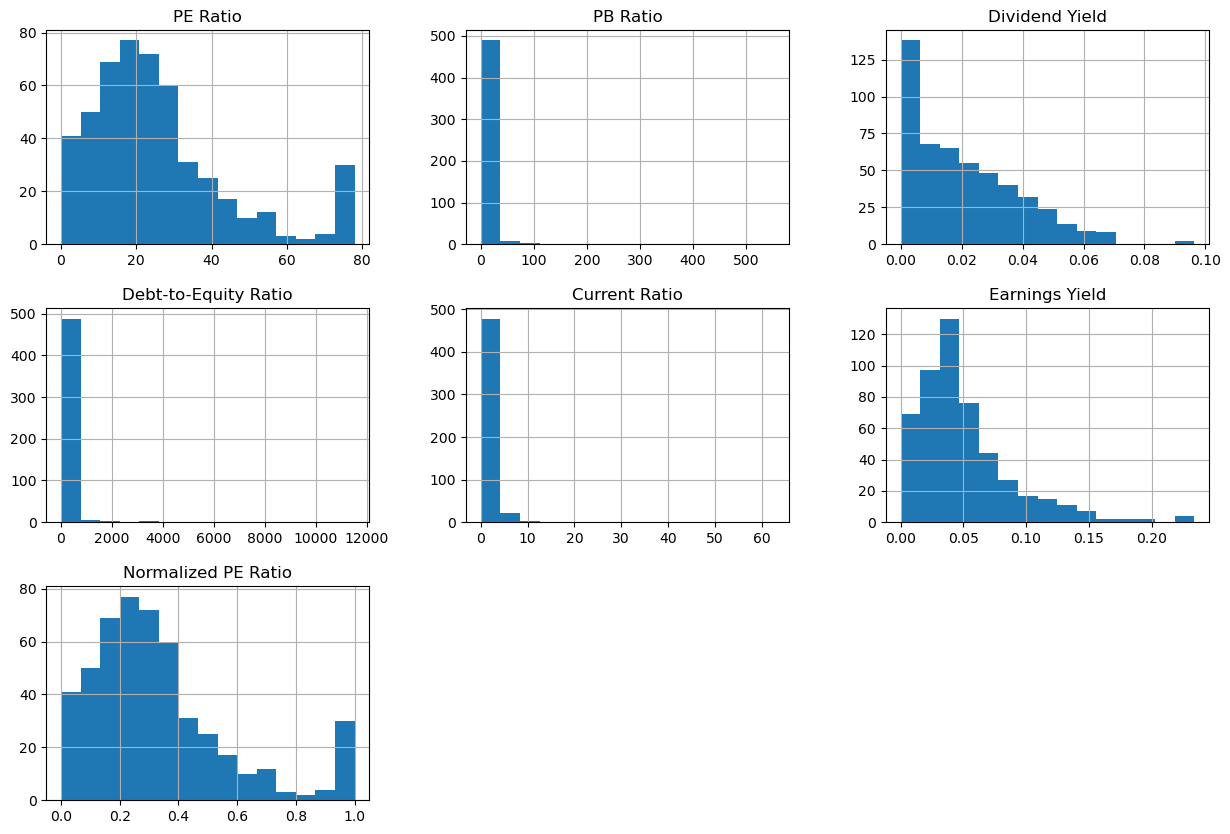

/opt/homebrew/anaconda3/envs/invest/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


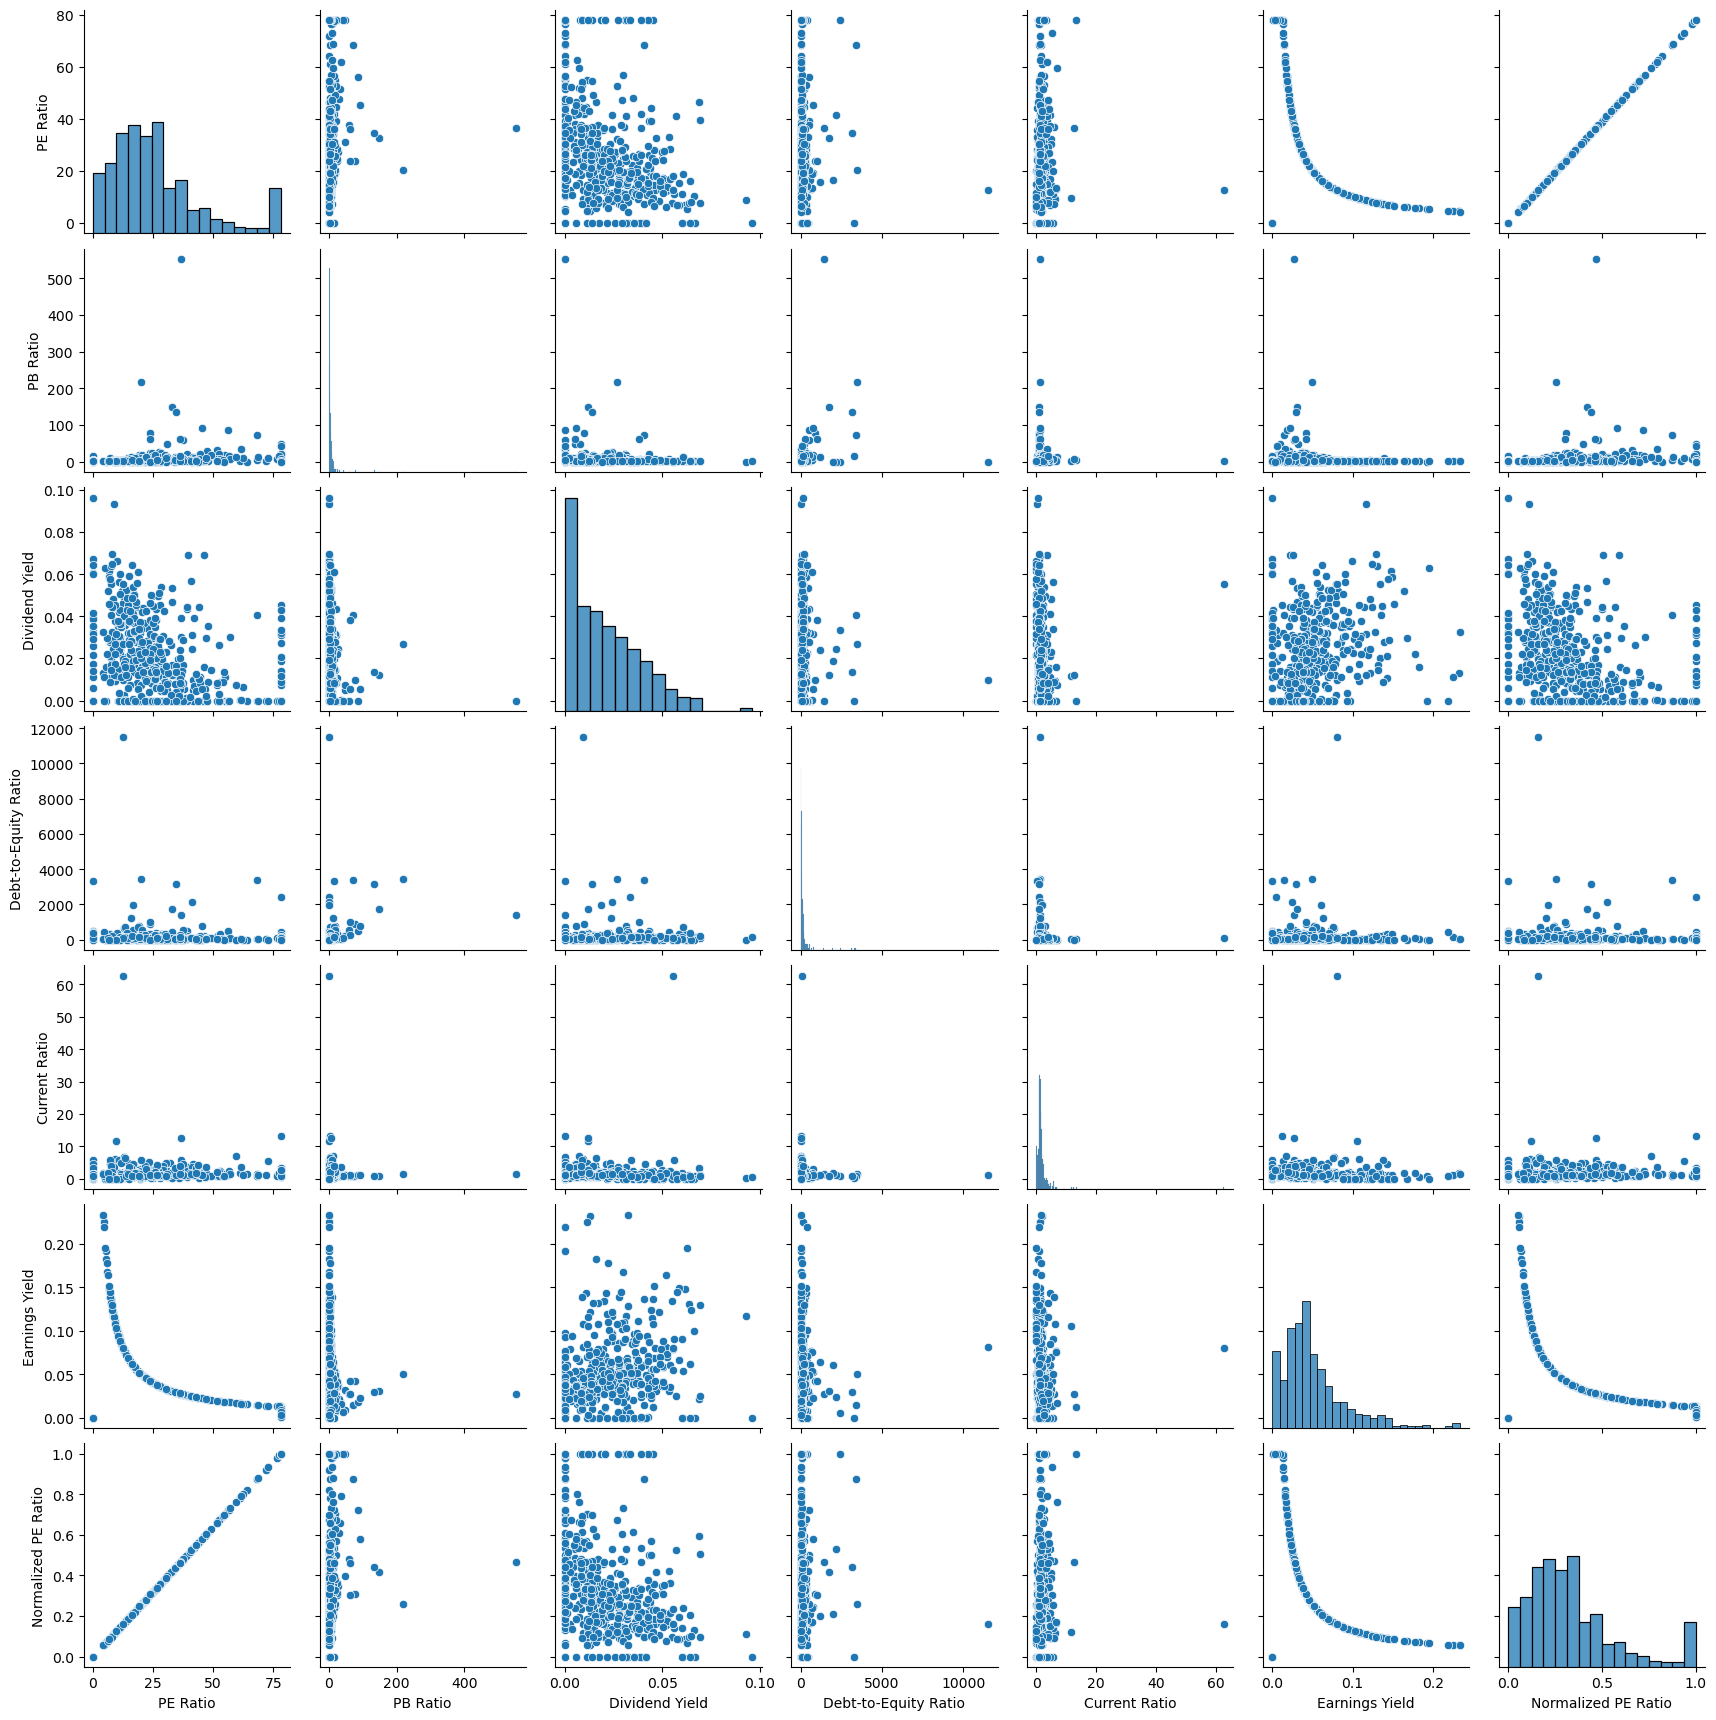

In [12]:
# Histograms for distributions
df.hist(bins=15, figsize=(15, 10))
plt.show()

# Scatter plots to find relationships
sns.pairplot(df)
plt.show()

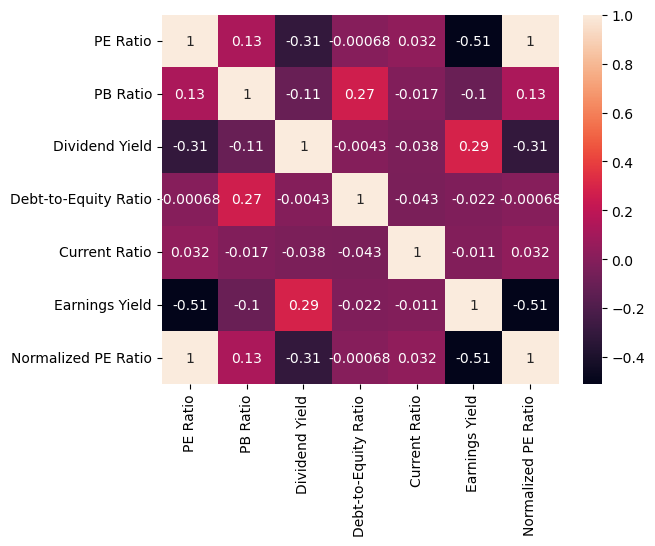

In [13]:
# Calculate and visualize correlations
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()